# Employee Attrition Prediction

## What is Employee Attrition?
Employee attrition, or the rate at which employees leave an organization, is a critical issue that affects businesses of all sizes. High attrition rates can lead to increased costs, disruption in operations, and loss of valuable knowledge. For these reasons, understanding and predicting employee attrition has become a priority for many organizations. With the rise of machine learning, businesses now have the tools to anticipate which employees are at risk of leaving, enabling proactive measures to improve retention.

## The Role of Machine Learning in Predicting Attrition
Traditional methods of managing attrition often rely on reactive approaches, such as exit interviews or manual analysis of HR data. However, these methods can be time-consuming and may not provide actionable insights until it’s too late. Machine learning offers a powerful alternative by allowing organizations to analyze vast amounts of data quickly and accurately, identifying patterns and trends that may not be obvious through manual analysis.

In this post, we’ll explore the machine learning model I built to predict employee attrition, from data collection to model evaluation, and discuss how it can be applied in real-world business scenarios.

## The Process
**Data Exploration**  The first step in building an effective machine learning model is understanding the data. In this project, I collected data from various sources, including employee records, performance reviews, and demographic information. This dataset included key variables such as employee age, tenure, job satisfaction, work-life balance, and more. During data exploration, I focused on identifying patterns, trends, and potential anomalies within the dataset. For example, I noticed that younger employees and those with lower job satisfaction scores tended to have higher attrition rates. This initial exploration was crucial for informing the subsequent stages of the project.

**Data Visualization**  To gain deeper insights into the data, I utilized data visualization techniques. Visualizations such as scatterplots, pie charts, and bar charts helped me better understand the distribution of data, relationships between variables, and potential outliers, such as in income distributions, gender distributions, job performance, etc. These visualisations could also become the backbone of future dashboards for business leaders, if they were needed for a quick overview of workforce data. Such dashboards, if captured with timestamps, could also give handy trends analyses with some tweaks to the underlying code. 

**Data Analytics & Evaluation** With a clearer understanding of the data, I moved on to more in-depth analytics. This involved analysing the data for bias. In particular, gender biases in income and tenure. I dug deep to ensure there was no significant signs of systemic bias. Data revealed no major concerns for gender bias in tenure or income, when controlling for their attrition status (i.e., survivor bias). 

**Model Building and Evaluation** 
To find the best model for predicting employee attrition, I experimented with PyCaret, which trains popular models simultaneously and evaluates them based on specified metrics. I used the F1 metric as my main source of evaluation - drawing on its benefits in balancing between minimising both True/False occurrences of Positive/Negative classification, which are tied to the cost/benefits to the business case. Ultimately, AdaBoost Classifier came out on top, and after some tuning, ended with an F1-score of 0.75 and an AUC of 0.85, which are quite encouraging results.

### Main goals:
- Create a model to predict attrition.
- Train it on data, optimise paramaters.
- Deploy model with a CSV drop in function.
- Most importantly: **to learn and grow - all mistakes are my own**

# Set Up, Data Ingest, Inspect

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('employee_attrit.csv')

In [3]:
df.head(3)

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed


In [4]:
print(df.columns)

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')


# Reporting - Data Visuals

Understanding the context, what are likely to be key drivers, and setting up a broader discussion about intelligence at the business. 

- What are our key demographic variables? How are they distributed?
- What is tenure like?
- What is pay like?
- What are the job performance stats?

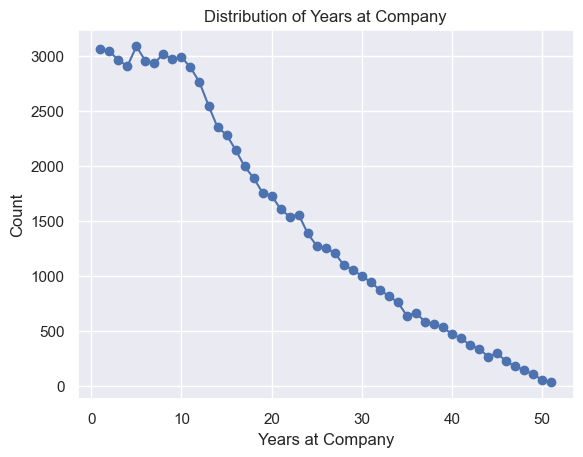

In [5]:
years_count = df['Years at Company'].value_counts().sort_index()

plt.plot(years_count.index, years_count.values, marker='o')
plt.xlabel('Years at Company')
plt.ylabel('Count')
plt.title('Distribution of Years at Company')
plt.grid(True)
plt.show()

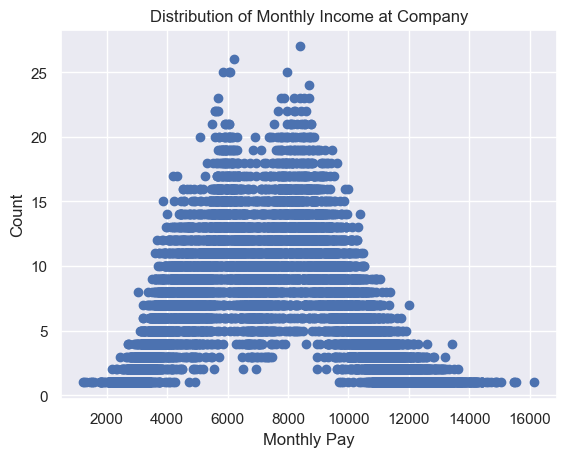

In [6]:
pay_count = df['Monthly Income'].value_counts().sort_index()

plt.scatter(pay_count.index, pay_count.values, marker='o')
plt.xlabel('Monthly Pay')
plt.ylabel('Count')
plt.title('Distribution of Monthly Income at Company')
plt.grid(True)
plt.show()

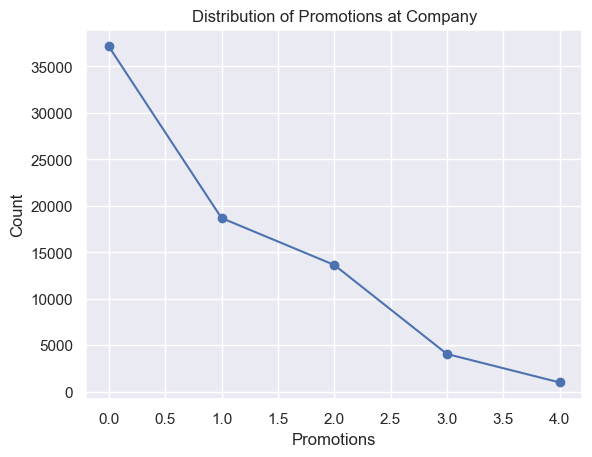

In [7]:
promo_count = df['Number of Promotions'].value_counts().sort_index()

plt.plot(promo_count.index, promo_count.values, marker='o')
plt.xlabel('Promotions')
plt.ylabel('Count')
plt.title('Distribution of Promotions at Company')
plt.grid(True)
plt.show()

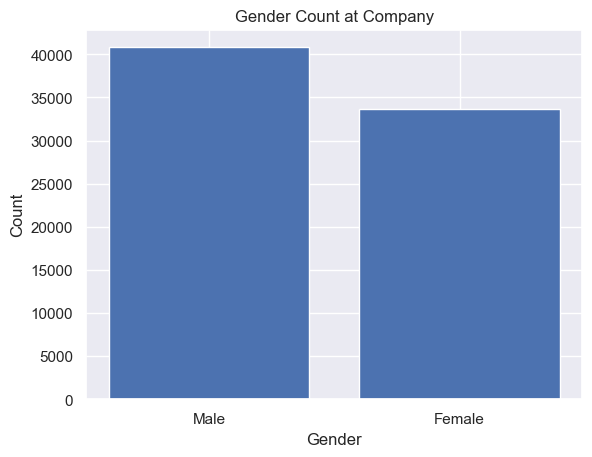

Proportion of Males: 0.548
Proportion of Females: 0.452


In [8]:
gender_count = df['Gender'].value_counts()

plt.bar(gender_count.index, gender_count.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Count at Company')
plt.grid(True)
plt.show()

print(f"Proportion of Males: {df['Gender'].value_counts(normalize=True).get('Male', 0):.3f}")
print(f"Proportion of Females: {df['Gender'].value_counts(normalize=True).get('Female', 0):.3f}")

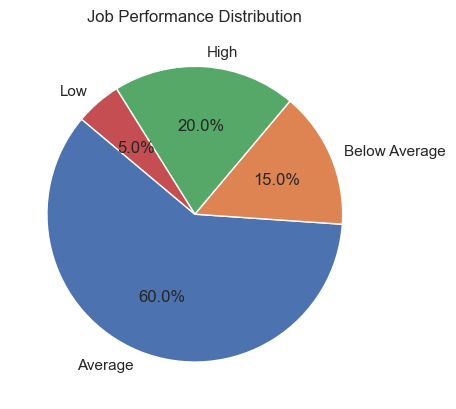

In [9]:
perf_rate = df['Performance Rating'].value_counts().sort_index()

plt.pie(perf_rate.values, labels=perf_rate.index, autopct='%1.1f%%', startangle=140)
plt.title('Job Performance Distribution')
plt.show()

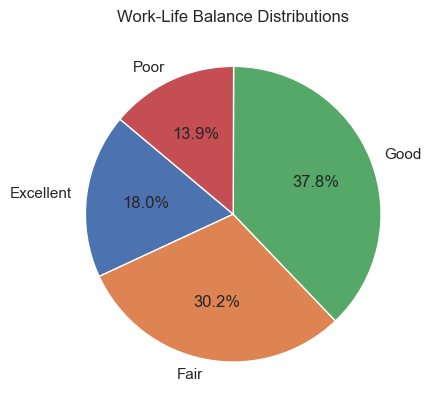

In [10]:
wlb_count = df['Work-Life Balance'].value_counts().sort_index()

plt.pie(wlb_count.values, labels=wlb_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Work-Life Balance Distributions')
plt.show()

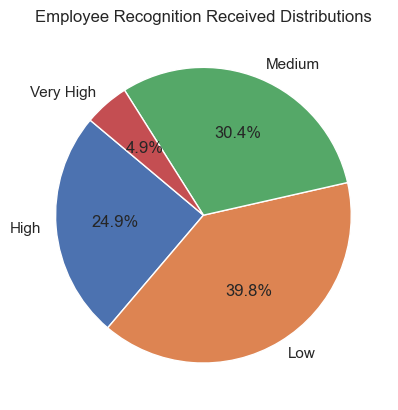

In [11]:
rec_count = df['Employee Recognition'].value_counts().sort_index()

plt.pie(rec_count.values, labels=rec_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Employee Recognition Received Distributions')
plt.show()

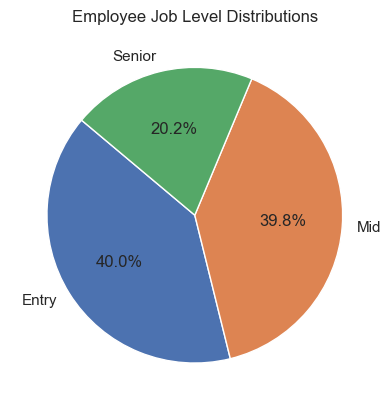

In [12]:
jl_count = df['Job Level'].value_counts().sort_index()

plt.pie(jl_count.values, labels=jl_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Employee Job Level Distributions')
plt.show()

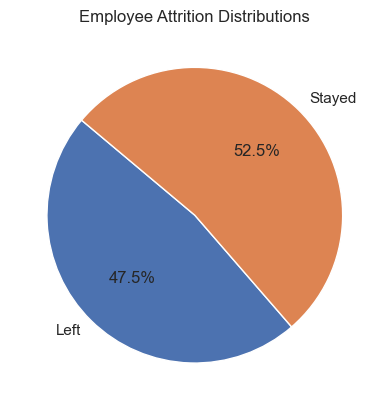

In [13]:
attrit_count = df['Attrition'].value_counts().sort_index()

plt.pie(attrit_count.values, labels=attrit_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Employee Attrition Distributions')
plt.show()

# Digging Further - Analytics & Evaluation

Now, I have a few further questions which can provide value. These questions are designed to:
1. Provide immediate value in determining if the metrics collected aren't biased by others (i.e., redundancy)
2. Provide insights to business partners: what's our exposure level? Are there any issues that we could nip in the bud, or be made aware of?

Questions are:
- Is there any bias in this organisation? Are there significant correlations between gender and income, promotions, and/or recongition?
- How about any significant correlates between attrition, gender, age, number of dependents, job level, work-life balance, and years at the company?
- How meritocratic is this business? What's the level of correlation between job performance rating and income?

In [14]:
from scipy.stats import ttest_ind

## Gender Bias Checks
- Using all data, stayers, and leavers
- with tenure
- with income
- with promotions

### Gender / Tenure

In [15]:
# Calculate the average tenure by gender
average_tenure_by_gender = df.groupby('Gender')['Years at Company'].mean()

# Display the result
for gender, tenure in average_tenure_by_gender.items():
    print(f"Average tenure for {gender}: {tenure:.2f}")

# Separate the tenure by gender
male_tenure = df[df['Gender'] == 'Male']['Years at Company']
female_tenure = df[df['Gender'] == 'Female']['Years at Company']

# Perform a t-test
t_stat, p_value = ttest_ind(male_tenure, female_tenure, equal_var=False)

# Display the results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

Average tenure for Female: 15.74
Average tenure for Male: 15.70
T-statistic: -0.45
P-value: 0.6532


Conclusion: there isn't a significant difference in the average years of tenure at the company by gender.

### Gender / Income

In [16]:
# Calculate the average monthly income by gender
average_income_by_gender = df.groupby('Gender')['Monthly Income'].mean()

# Display the result
for gender, income in average_income_by_gender.items():
    print(f"Average income for {gender}: {income:.2f}")

# Separate the monthly income by gender
male_income = df[df['Gender'] == 'Male']['Monthly Income']
female_income = df[df['Gender'] == 'Female']['Monthly Income']

# Perform a t-test
t_stat, p_value = ttest_ind(male_income, female_income, equal_var=False)

# Display the results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

Average income for Female: 7301.38
Average income for Male: 7297.73
T-statistic: -0.23
P-value: 0.8181


Conclusion: there is significant evidence for gender/income bias. In fact, females are paid higher than males on average. 

### Gender / Promotions

In [17]:
# Calculate the average monthly income by gender
average_promo_by_gender = df.groupby('Gender')['Number of Promotions'].mean()

# Display the result
for gender, promo in average_promo_by_gender.items():
    print(f"Average promotions for {gender}: {promo:.2f}")

# Separate the promotions by gender
male_promo = df[df['Gender'] == 'Male']['Number of Promotions']
female_promo = df[df['Gender'] == 'Female']['Number of Promotions']

# Perform a t-test
t_stat, p_value = ttest_ind(male_promo, female_promo, equal_var=False)

# Display the results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

Average promotions for Female: 0.83
Average promotions for Male: 0.83
T-statistic: -0.40
P-value: 0.6874


Conclusion: no significant gender bias in promotions either. Both have the same average number of promotions. 

**Let's dig a little deeper** to make sure there is no survivorship bias in this analysis. Let's divide by those than stayed and those that left. Those that stayed might be getting paid well and have promotions, while those that left haven't had that.

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway

In [19]:
df['Attrition'] = df['Attrition'].astype(str)
attrit_map = {'Stayed': 0, 'Left': 1}
df['Attrition'] = df['Attrition'].map(attrit_map)

### Attrition Status / Gender / Tenure

In [20]:
# Calculate the average tenure by gender and attrition
average_tenure_by_gender_attrit = df.groupby(['Gender', 'Attrition'])['Years at Company'].mean()

# Display the result
for (gender, attrition), tenure in average_tenure_by_gender_attrit.items():
    print(f"Average tenure for {gender} {'Stayed' if attrition == 0 else 'Left'}: {tenure:.2f}")
    
# Separate the tenure by gender and attrition
male_stay_tenure = df[(df['Gender'] == 'Male') & (df['Attrition'] == 0)]['Years at Company']
male_left_tenure = df[(df['Gender'] == 'Male') & (df['Attrition'] == 1)]['Years at Company']
female_stay_tenure = df[(df['Gender'] == 'Female') & (df['Attrition'] == 0)]['Years at Company']
female_left_tenure = df[(df['Gender'] == 'Female') & (df['Attrition'] == 1)]['Years at Company']


# Perform the one-way ANOVA
f_statistic, p_value = f_oneway(male_stay_tenure, male_left_tenure, female_stay_tenure, female_left_tenure)

# Display the results
print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

Average tenure for Female Stayed: 16.55
Average tenure for Female Left: 15.03
Average tenure for Male Stayed: 16.33
Average tenure for Male Left: 14.87
F-statistic: 108.37
P-value: 0.0000


Interpretation: there are significant differences here. But it looks to be more between the males that left and males that stayed, and the females that left and females that stayed. That's to be expected. There doesn't seem to be much difference between the scores of the stayers or leavers when gender is held constant.

### Attrition Status / Gender / Promotions

In [21]:
# Calculate the average tenure by gender and attrition
average_promo_by_gender_attrit = df.groupby(['Gender', 'Attrition'])['Number of Promotions'].mean()

# Display the result
for (gender, attrition), tenure in average_promo_by_gender_attrit.items():
    print(f"Average promotions for {gender} {'Stayed' if attrition == 0 else 'Left'}: {tenure:.2f}")
    
# Separate the tenure by gender and attrition
male_stay_promo = df[(df['Gender'] == 'Male') & (df['Attrition'] == 0)]['Number of Promotions']
male_left_promo = df[(df['Gender'] == 'Male') & (df['Attrition'] == 1)]['Number of Promotions']
female_stay_promo = df[(df['Gender'] == 'Female') & (df['Attrition'] == 0)]['Number of Promotions']
female_left_promo = df[(df['Gender'] == 'Female') & (df['Attrition'] == 1)]['Number of Promotions']


# Perform the one-way ANOVA
f_statistic, p_value = f_oneway(male_stay_promo, male_left_promo, female_stay_promo, female_left_promo)

# Display the results
print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

Average promotions for Female Stayed: 0.93
Average promotions for Female Left: 0.75
Average promotions for Male Stayed: 0.89
Average promotions for Male Left: 0.75
F-statistic: 169.30
P-value: 0.0000


Interpretation: again, here the p-value is significant, but is picking up on the differences between the stayers and the leavers, when gender is held constant. There doesn't seem to be a gender bias when you take their attrition status into account.

### Attrition Status / Gender / Income

In [22]:
# Calculate the average tenure by gender and attrition
average_income_by_gender_attrit = df.groupby(['Gender', 'Attrition'])['Monthly Income'].mean()

# Display the result
for (gender, attrition), income in average_income_by_gender_attrit.items():
    print(f"Average income for {gender} {'Stayed' if attrition == 0 else 'Left'}: {income:.2f}")
    
# Separate the tenure by gender and attrition
male_stay_income = df[(df['Gender'] == 'Male') & (df['Attrition'] == 0)]['Monthly Income']
male_left_income = df[(df['Gender'] == 'Male') & (df['Attrition'] == 1)]['Monthly Income']
female_stay_income = df[(df['Gender'] == 'Female') & (df['Attrition'] == 0)]['Monthly Income']
female_left_income = df[(df['Gender'] == 'Female') & (df['Attrition'] == 1)]['Monthly Income']

# Perform the one-way ANOVA
f_statistic, p_value = f_oneway(male_stay_income, male_left_income, female_stay_income, female_left_income)

# Display the results
print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

Average income for Female Stayed: 7339.66
Average income for Female Left: 7267.44
Average income for Male Stayed: 7308.76
Average income for Male Left: 7283.07
F-statistic: 3.64
P-value: 0.0122


### Overall interpretation:
- Both levels of analyses show that there shouldn't be an issue with gender bias. At the non-split level, T-tests reveal there don't seem to be any issues with gender and key indicators of bias at a system-wide level at this firm. Females are paid, on average, higher than males. Their tenure and rate of promotion seems to be about even too.
- When splitting the data for leavers and stayers, there still wasn't any significant difference for tenure, or promotions.
- Income revealed that there are differences, and those between females who stayed and females who left. This could potentially indicate that women start at lower salaries. Or it could reflect maternity leave knock-on effects. Or bias. **I want to run one more check, and look at pay by levels and by gender**

## Pay Associations
- with job level and gender

In [23]:
df['Job Level'] = df['Job Level'].astype(str)
lvl_map = {'Entry': 1, 'Mid': 2, 'Senior': 3}
df['Job Level'] = df['Job Level'].map(lvl_map)

In [24]:
# Calculate the average income by gender, attrition, and job level
average_income_by_gender_attrit_level = df.groupby(['Gender', 'Attrition', 'Job Level'])['Monthly Income'].mean()

# Display the result
for (gender, attrition, lvl), income in average_income_by_gender_attrit_level.items():
    job_level = 'Entry' if lvl == 1 else 'Mid' if lvl == 2 else 'Senior'
    attrition_status = 'Stayed' if attrition == 0 else 'Left'
    print(f"Average income for {gender}, {job_level}, {attrition_status}: {income:.2f}")

Average income for Female, Entry, Stayed: 7358.47
Average income for Female, Mid, Stayed: 7299.94
Average income for Female, Senior, Stayed: 7375.87
Average income for Female, Entry, Left: 7290.33
Average income for Female, Mid, Left: 7242.37
Average income for Female, Senior, Left: 7244.55
Average income for Male, Entry, Stayed: 7349.84
Average income for Male, Mid, Stayed: 7293.77
Average income for Male, Senior, Stayed: 7289.86
Average income for Male, Entry, Left: 7291.03
Average income for Male, Mid, Left: 7278.32
Average income for Male, Senior, Left: 7249.73


Interpretation: it does seem like there isn't a significant gender pay gap at this company. Splitting up by attrition status, gender, and looking at income level shows that stayers earn more on average than leavers. And thate female stayers/leavers earned more than their male counterparts. 

# Machine Learning Experiments #1
- When predicting attrition, we'd like an easy-to-understand metric to use to make decisions.
- Something like accuracy may be a good place to start. But given that missing attrition (i.e., false positive) is likely to be more annoying than mistakenly thinking someone will leave but doesn't (i.e., false negative), it might favour looking at precision.



A general overview of benefits for each metrics:
- Accuracy is straightforward and useful for balanced datasets.
- Precision focuses on the quality of positive predictions and is key when false positives are costly.
- Recall emphasizes capturing all actual positives and is critical when missing positives is expensive.
- F1-Score provides a balanced metric when considering both precision and recall.
- MCC is best used when you need a balanced measure considering all aspects of the confusion matrix, especially with imbalanced class distributions.

## An in-depth look at Classification Metrics for Our Use Case
1. **Recall**
- **Why it's important:** Recall measures how well your model identifies actual cases of attrition (those who leave). High recall is crucial in this context because missing an employee likely to leave (false negative) could be costly. **Focus:** Maximizing recall ensures we identify most likely employees to leave.
2. **Precision**
- **Why it's important:** Precision measures how many of the employees your model predicts as likely to leave actually do leave. If precision is low, we could overestimate the number of employees who will leave, leading to unnecessary interventions. **Focus:** High precision is also important, but it should be balanced with recall, depending on how costly false positives (predicting someone will leave when they won't) are for your organization.
3. **F1-Score**
- **Why it's important:** The F1-Score is the harmonic mean of precision and recall, providing a single metric that balances the two. If we need to consider both false positives and false negatives, the F1-score is the metric. **Focus:** Use F1-Score for a balanced perspective between precision and recall.
4. **AUC**
- **Why it's important:** AUC gives you a broader view of a model's performance across all possible threshold values. It helps you understand how well the model can distinguish between employees who will stay and those who will leave. Scores above .80 are considered good, and above .90 are excellent and signs of a really top-performing model. **Focus:** A high AUC indicates that your model is good at ranking employees by their likelihood of leaving. It is a useful metric for comparing different models regardless of their decision threshold. 
5. **MCC**
- **Why it's important:** MCC is a balanced measure that considers all four outcomes: true positives, true negatives, false positives, and false negatives. - It's particularly useful if you want a more nuanced understanding of model performance across both classes, especially in cases of imbalanced data. **Focus:** MCC is helpful if your dataset is imbalanced and you want a single metric that accounts for all aspects of the confusion matrix.

### What this means for us
- First, let's assume a typical business scenario. We know that it costs roughly 30-50% of an employee's wages to onboard them. So, we can take that as the cost of a leaver.
- Meanwhile, in identifying a potential leaver, the cost to keep may range 15-20% of their wages. This might be through increased managerial support, access to learning and development (e.g., leadership programs, etc.), or wage increases.
- Bottom line: missing a leaver is more expensive than giving extra resources to a potential leaver who will stay. But, if we overidentify potential leavers who won't leave, we'll end up eating up the same amount of money as before, especially if the classification is imbalanced towards positive identification. This would increase the potential for false positives.

### Breaking down the math:
- Average monthly income here is 7300. Let's assume every intervention works. 
- True Positive: we identify a leaver who will leave, and we can apply 20% of avg wages to keep them. This is €1460 per FTE retained cost, with a €3650 payoff, giving a net benefit of €2190. 
- False Positive: we identify a leaver who is staying, and we apply 20% of avg wages to keep them. This is €1460 per FTE retained cost, with no net benefit, because they're not intending to leave. 
- True Negative: we identify a stayer, who will stay, and we apply no intervention (no cost).
- False Negative: we identify a stayer, who will leave, apply no intervention, and pay 50% of avg wage. This costs us €3650.

### Bottom line:
- True positive benefit of €2190
- False positive costs €1460
- False negative costs €3650

Ultimately, we want to reduce the false hits overall, reducing costs. I'm going to start with Precision but also look into F1 later on. Precision is a good place to start because increasing True Positive and decreasing False Positives gives us a nice approach of getting benefits of retention while also minimising costs in pursuit of those. 

But F1 is likely to the best metric if business leaders are undecided on their couse of action. I will experiment with both in my model building.

### Why F1  is the Best Metric for our Business Case:
Balanced Overview: F1 measures how well the model distinguishes between true/false positives/negatives, taking a balanced approach to both. Essentially balancing precision and recall. This is particularly useful concerning false positives and negatives, especially given the cost/benefits of each.

Cost Implications: Given that missing a leaver (false negative) is more costly than intervening with a potential leaver who stays (false positive), F1 helps us understand the overall ability of the model to predict individuals correctly. A higher F1 means the model is balancing well between true/false positives/negatives without exposing itself to unbalanced error in either side of its classification duties. 

 Business Case:
- True Positives: Identifying and retaining leavers brings a net benefit, as the cost of intervention outweighs the savings from avoiding attrition.
- False Positives: Although intervening with someone who isn’t leaving incurs a cost, it’s still less than the cost of losing an employee.
- True Negatives and False Negatives: Correctly identifying stayers has no cost, but missing a leaver is expensive.

Overall, F1 is a suitable metric because it gives us a holistic view of the model's ability to discriminate between potential leavers and stayers, giving a balanced perspective on the trade-offs between false positives and false negatives in a cost-sensitive environment.

In [25]:
df = pd.read_csv('employee_attrit.csv')
df['Attrition'] = df['Attrition'].astype(str)
df['Attrition'] = df['Attrition'].str.strip()
df['Attrition'] = df['Attrition'].map({'Left': 1, 'Stayed': 0})

In [26]:
from pycaret.classification import *
from pycaret.classification import ClassificationExperiment

In [27]:
ord_features = {
    'Work-Life Balance': ['Poor', 'Fair', 'Good', 'Excellent'], 
    'Job Satisfaction': ['Low', 'Medium', 'High'],
    'Performance Rating': ['Low', 'Below Average', 'Average', 'High'],
    'Job Level': ['Entry', 'Mid', 'Senior'], 
    'Company Size': ['Small', 'Medium', 'Large'], 
    'Company Reputation': ['Poor', 'Fair', 'Good', 'Excellent'], 
    'Employee Recognition': ['Low', 'Medium', 'High', 'Very High']
}

s = setup(df, target = 'Attrition', ignore_features = 'Employee ID', session_id = 42, ordinal_features = ord_features)

,Description,Value
0,Session id,42
1,Target,Attrition
2,Target type,Binary
3,Original data shape,"(74498, 24)"
4,Transformed data shape,"(74498, 52)"
5,Transformed train set shape,"(52148, 52)"
6,Transformed test set shape,"(22350, 52)"
7,Ignore features,11
8,Ordinal features,7
9,Numeric features,7


In [30]:
best3_models = compare_models(turbo = True, n_select = 3, sort = 'F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7614,0.8538,0.7460,0.7501,0.7480,0.5215,0.5215,0.4180
lightgbm,Light Gradient Boosting Machine,0.7593,0.8495,0.7462,0.7467,0.7464,0.5174,0.5174,0.2710
catboost,CatBoost Classifier,0.7583,0.8491,0.7446,0.7460,0.7453,0.5154,0.5155,2.8140
gbc,Gradient Boosting Classifier,0.7589,0.8497,0.7420,0.7481,0.7450,0.5164,0.5165,0.8780
ridge,Ridge Classifier,0.7510,0.8420,0.7390,0.7373,0.7381,0.5008,0.5009,0.1860
lda,Linear Discriminant Analysis,0.7510,0.8420,0.7390,0.7373,0.7381,0.5008,0.5009,0.2450
nb,Naive Bayes,0.7389,0.8188,0.7712,0.7060,0.7371,0.4787,0.4806,0.1820
lr,Logistic Regression,0.7501,0.8403,0.7335,0.7384,0.7359,0.4987,0.4987,2.0060
rf,Random Forest Classifier,0.7465,0.8343,0.7181,0.7401,0.7289,0.4909,0.4911,0.6380
et,Extra Trees Classifier,0.7373,0.8239,0.7111,0.7291,0.7199,0.4727,0.4729,0.6860


Interpretation: by setting precision as my sorting metric, we've found that the Ada Boost Classifier is doing the best job at predicting those that leave (1) and stay (0) best, when focusing on the quality of positive predictions. It's also doing the best job in recall, which punishes false negatives too. So that is reassuring that when we want to predict attrition, the model is not going to be over predicting in either direction, it is a fairly balanced approach. 

Other important points, n_select = 3, means that the top three models have been selected. This is so we can tune each individually to get their optimised parameters, then blend the models together to get some more F1 benefits hopefully, and then, finally, save the model for future deployment. 

In [31]:
tuned_models = [tune_model(i, optimize = 'F1') for i in best3_models]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7519,0.8421,0.7351,0.7404,0.7377,0.5023,0.5023
1,0.7580,0.8438,0.7411,0.7471,0.7441,0.5146,0.5146
2,0.7584,0.8479,0.7407,0.7480,0.7443,0.5153,0.5153
3,0.7509,0.8397,0.7367,0.7382,0.7374,0.5005,0.5005
4,0.7517,0.8417,0.7492,0.7335,0.7413,0.5026,0.5027
5,0.7641,0.8540,0.7637,0.7457,0.7546,0.5276,0.5278
6,0.7463,0.8347,0.7351,0.7318,0.7334,0.4914,0.4914
7,0.7620,0.8505,0.7524,0.7479,0.7502,0.5230,0.5230
8,0.7482,0.8387,0.7236,0.7401,0.7318,0.4945,0.4946


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7578,0.8476,0.7456,0.7447,0.7451,0.5144,0.5144
1,0.7618,0.8499,0.7435,0.7520,0.7478,0.5222,0.5222
2,0.7636,0.8545,0.7391,0.7571,0.7480,0.5254,0.5255
3,0.7553,0.8451,0.7411,0.7429,0.7420,0.5093,0.5093
4,0.7572,0.8482,0.7492,0.7420,0.7456,0.5135,0.5135
5,0.7697,0.8602,0.7710,0.7507,0.7607,0.5388,0.5390
6,0.7498,0.8408,0.7326,0.7383,0.7355,0.4981,0.4981
7,0.7686,0.8556,0.7573,0.7557,0.7565,0.5360,0.5360
8,0.7470,0.8430,0.7232,0.7384,0.7308,0.4922,0.4923


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7611,0.8491,0.7532,0.7460,0.7496,0.5212,0.5212
1,0.7605,0.8533,0.7371,0.7532,0.7451,0.5193,0.5194
2,0.7682,0.8570,0.7460,0.7610,0.7534,0.5347,0.5348
3,0.7576,0.8483,0.7395,0.7473,0.7434,0.5138,0.5138
4,0.7603,0.8511,0.7569,0.7431,0.7499,0.5198,0.5199
5,0.7737,0.8620,0.7771,0.7539,0.7653,0.5470,0.5472
6,0.7513,0.8441,0.7338,0.7401,0.7370,0.5011,0.5011
7,0.7709,0.8573,0.7625,0.7567,0.7596,0.5407,0.5407
8,0.7480,0.8445,0.7253,0.7390,0.7321,0.4942,0.4943


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [32]:
blended = blend_models(tuned_models, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7605,0.8496,0.7520,0.7457,0.7488,0.5200,0.5200
1,0.7609,0.8528,0.7411,0.7517,0.7464,0.5202,0.5203
2,0.7664,0.8568,0.7443,0.7591,0.7516,0.5313,0.5313
3,0.7567,0.8478,0.7395,0.7458,0.7426,0.5119,0.5119
4,0.7578,0.8509,0.7516,0.7417,0.7466,0.5147,0.5147
5,0.7732,0.8622,0.7771,0.7530,0.7649,0.5458,0.5461
6,0.7501,0.8437,0.7379,0.7364,0.7371,0.4991,0.4991
7,0.7693,0.8576,0.7589,0.7561,0.7575,0.5375,0.5375
8,0.7489,0.8449,0.7253,0.7405,0.7328,0.4961,0.4962


In [33]:
tune_blend = tune_model(blended, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7601,0.8493,0.7524,0.7449,0.7486,0.5192,0.5193
1,0.7609,0.8534,0.7387,0.7530,0.7458,0.5201,0.5202
2,0.7672,0.8571,0.7452,0.7599,0.7524,0.5328,0.5329
3,0.7580,0.8484,0.7395,0.7480,0.7437,0.5145,0.5145
4,0.7607,0.8512,0.7561,0.7440,0.7500,0.5205,0.5206
5,0.7745,0.8622,0.7763,0.7555,0.7657,0.5484,0.5486
6,0.7517,0.8442,0.7342,0.7405,0.7374,0.5019,0.5019
7,0.7693,0.8575,0.7605,0.7553,0.7579,0.5376,0.5376
8,0.7491,0.8447,0.7261,0.7404,0.7332,0.4965,0.4966


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [34]:
predict_model(tune_blend)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7556,0.8504,0.7454,0.7413,0.7433,0.5101,0.5101


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition,prediction_label,prediction_score
22233,20,Male,9,Technology,5547,Fair,Medium,Average,0,No,...,Medium,16,No,No,No,Good,Very High,0,0,0.6020
10559,31,Female,5,Healthcare,8385,Good,Low,Average,2,Yes,...,Small,66,Yes,No,No,Good,High,0,0,0.7715
40629,45,Male,5,Education,4470,Fair,Very High,High,2,No,...,Medium,27,No,No,No,Fair,High,1,1,0.7931
21357,54,Female,4,Finance,8301,Fair,High,Average,2,No,...,Medium,81,No,No,No,Good,Low,1,0,0.6036
12458,56,Male,27,Education,5137,Excellent,Very High,Average,1,No,...,Medium,50,No,No,No,Poor,High,1,0,0.5961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39113,58,Male,33,Technology,11106,Good,High,Average,2,No,...,Small,107,No,No,No,Poor,Low,1,1,0.7325
12372,22,Female,2,Healthcare,8904,Good,Medium,Low,1,No,...,Medium,61,Yes,No,No,Good,Medium,0,0,0.5490
52427,27,Female,5,Healthcare,9062,Poor,Low,Average,0,No,...,Medium,10,No,No,No,Poor,Medium,1,1,0.8159
10392,23,Male,5,Technology,9277,Good,Medium,Average,0,No,...,Medium,75,No,No,No,Good,Low,1,0,0.5917


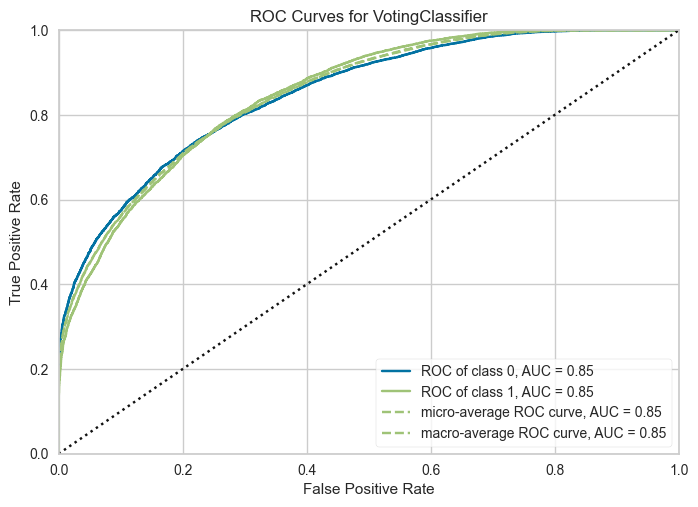

In [35]:
plot_model(tune_blend, plot = 'auc')

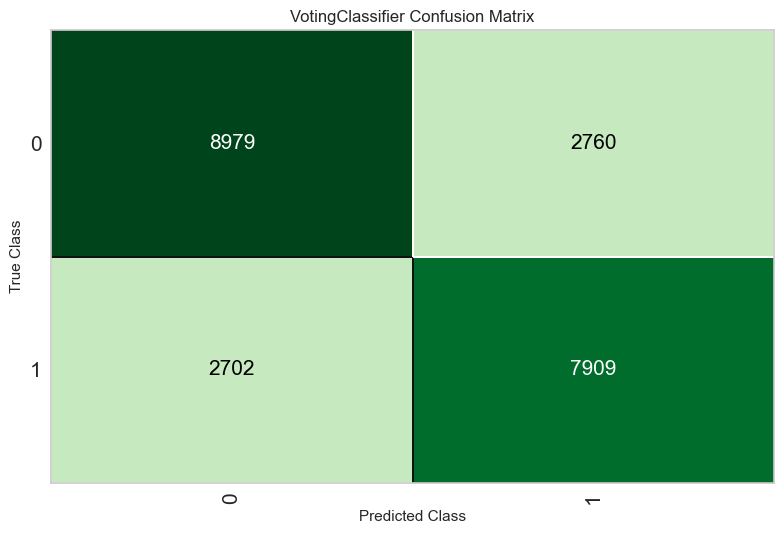

In [36]:
plot_model(tune_blend, plot = 'confusion_matrix')

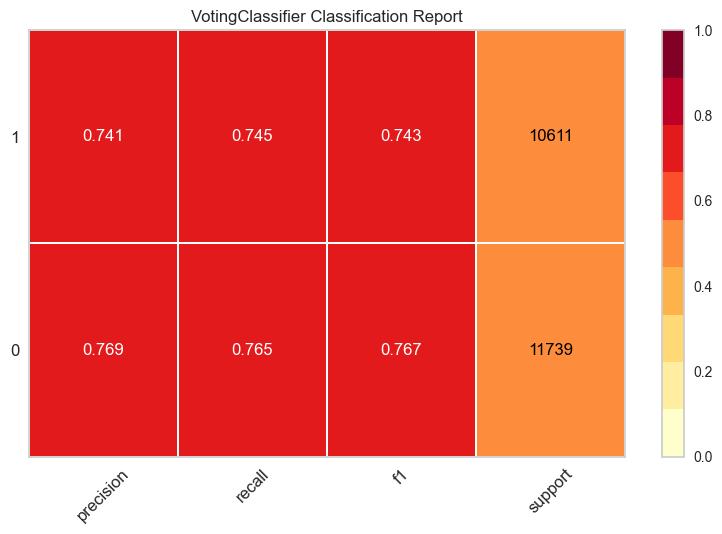

In [37]:
plot_model(tune_blend, plot = 'class_report')

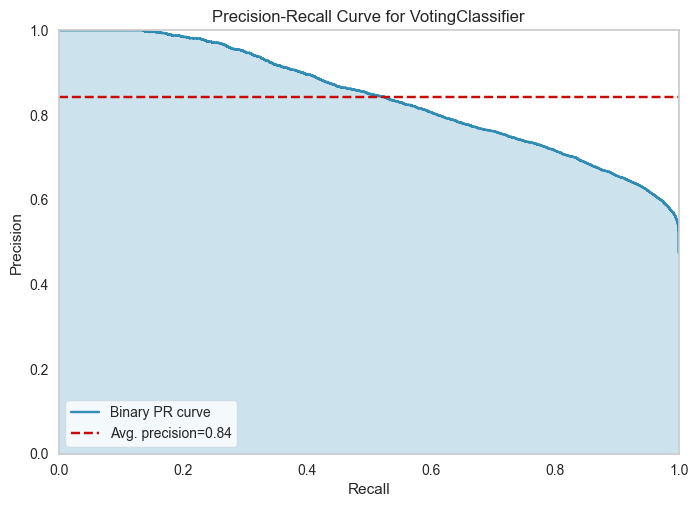

In [38]:
plot_model(tune_blend, plot = 'pr')

### Interpretation:
- So I've taken the best 3 models, tuned them individually, blended them, and then tuned that blended model.
- This blended model performs marginally better than the top 1 model in the initial stages of model building.
- So I'm going to trace back my steps, re-do it but with just the top 1 model. And test that to see which model performs better on the unseen data.

In [50]:
best1_model = compare_models(turbo = True, n_select = 1, sort = 'F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7614,0.8538,0.7460,0.7501,0.7480,0.5215,0.5215,0.4350
lightgbm,Light Gradient Boosting Machine,0.7593,0.8495,0.7462,0.7467,0.7464,0.5174,0.5174,0.2890
catboost,CatBoost Classifier,0.7583,0.8491,0.7446,0.7460,0.7453,0.5154,0.5155,2.7320
gbc,Gradient Boosting Classifier,0.7589,0.8497,0.7420,0.7481,0.7450,0.5164,0.5165,0.9000
ridge,Ridge Classifier,0.7510,0.8420,0.7390,0.7373,0.7381,0.5008,0.5009,0.1770
lda,Linear Discriminant Analysis,0.7510,0.8420,0.7390,0.7373,0.7381,0.5008,0.5009,0.2570
nb,Naive Bayes,0.7389,0.8188,0.7712,0.7060,0.7371,0.4787,0.4806,0.1890
lr,Logistic Regression,0.7501,0.8403,0.7335,0.7384,0.7359,0.4987,0.4987,1.8790
rf,Random Forest Classifier,0.7465,0.8343,0.7181,0.7401,0.7289,0.4909,0.4911,0.6040
et,Extra Trees Classifier,0.7373,0.8239,0.7111,0.7291,0.7199,0.4727,0.4729,0.6930


In [51]:
tuned_best1 = tune_model(best1_model, optimize = 'F1', search_library = 'scikit-optimize')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7350,0.8226,0.7379,0.7137,0.7256,0.4695,0.4697
1,0.7413,0.8258,0.7371,0.7233,0.7301,0.4818,0.4819
2,0.7421,0.8303,0.7056,0.7393,0.7221,0.4817,0.4822
3,0.7384,0.8212,0.7306,0.7219,0.7262,0.4759,0.4759
4,0.7327,0.8199,0.7423,0.7086,0.7250,0.4652,0.4657
5,0.7517,0.8388,0.7649,0.7265,0.7452,0.5034,0.5040
6,0.7279,0.8149,0.6955,0.7214,0.7082,0.4535,0.4537
7,0.7407,0.8297,0.7411,0.7207,0.7308,0.4809,0.4811
8,0.7305,0.8222,0.7071,0.7202,0.7136,0.4592,0.4593


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [52]:
calibrated_1 = calibrate_model(best1_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7578,0.8509,0.7496,0.7427,0.7461,0.5146,0.5146
1,0.7618,0.8542,0.7407,0.7535,0.7470,0.5221,0.5221
2,0.7640,0.8578,0.7423,0.7561,0.7491,0.5263,0.5264
3,0.7582,0.8492,0.7391,0.7485,0.7438,0.5149,0.5149
4,0.7599,0.8519,0.7553,0.7432,0.7492,0.5190,0.5191
5,0.7737,0.8634,0.7726,0.7561,0.7643,0.5468,0.5469
6,0.7517,0.8451,0.7334,0.7409,0.7372,0.5018,0.5019
7,0.7686,0.8580,0.7565,0.7562,0.7563,0.5359,0.5359
8,0.7522,0.8457,0.7289,0.7439,0.7363,0.5027,0.5027


In [53]:
predict_model(calibrated_1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.7574,0.8513,0.7460,0.7437,0.7449,0.5136,0.5136


,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition,prediction_label,prediction_score
22233,20,Male,9,Technology,5547,Fair,Medium,Average,0,No,...,Medium,16,No,No,No,Good,Very High,0,0,0.6965
10559,31,Female,5,Healthcare,8385,Good,Low,Average,2,Yes,...,Small,66,Yes,No,No,Good,High,0,0,0.9370
40629,45,Male,5,Education,4470,Fair,Very High,High,2,No,...,Medium,27,No,No,No,Fair,High,1,1,0.9569
21357,54,Female,4,Finance,8301,Fair,High,Average,2,No,...,Medium,81,No,No,No,Good,Low,1,0,0.6813
12458,56,Male,27,Education,5137,Excellent,Very High,Average,1,No,...,Medium,50,No,No,No,Poor,High,1,0,0.6506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39113,58,Male,33,Technology,11106,Good,High,Average,2,No,...,Small,107,No,No,No,Poor,Low,1,1,0.8580
12372,22,Female,2,Healthcare,8904,Good,Medium,Low,1,No,...,Medium,61,Yes,No,No,Good,Medium,0,0,0.6137
52427,27,Female,5,Healthcare,9062,Poor,Low,Average,0,No,...,Medium,10,No,No,No,Poor,Medium,1,1,0.9867
10392,23,Male,5,Technology,9277,Good,Medium,Average,0,No,...,Medium,75,No,No,No,Good,Low,1,0,0.6162


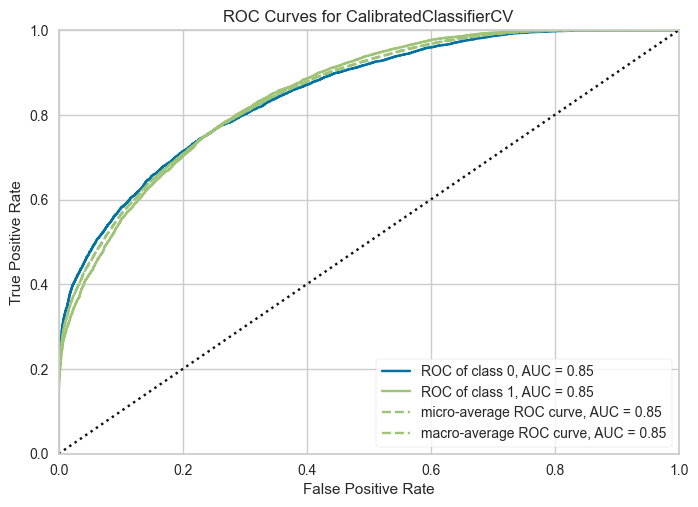

In [54]:
plot_model(calibrated_1, plot = 'auc')

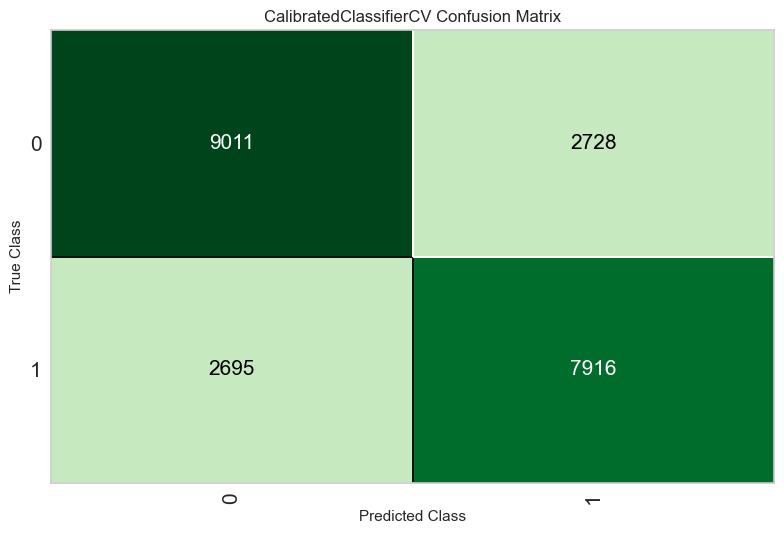

In [55]:
plot_model(calibrated_1, plot = 'confusion_matrix')

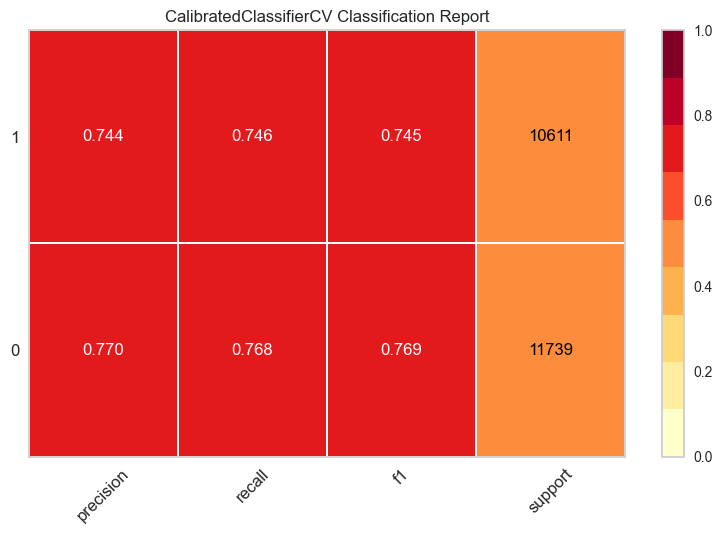

In [56]:
plot_model(calibrated_1, plot = 'class_report')

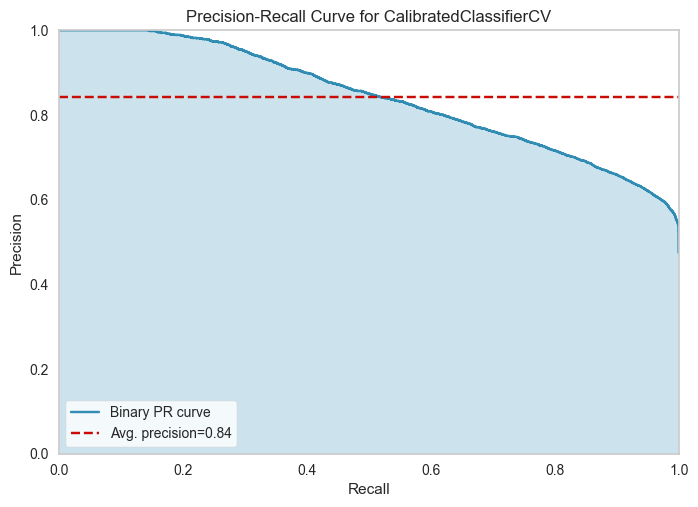

In [57]:
plot_model(calibrated_1, plot = 'pr')

### Final Thoughts
- Going with a single model seems like a strong option here, instead of blending models. The difference is minimal, but saves on compute for the smaller model, with slighly higher F1 metrics performance.
- Now we have a strong baseline model to work off of.

### Extra thoughts
- Would dividing datasets by the "job role" category work to enhance the metrics? My reason for thinking this is that there may be some particular parts of the business, like finance, etc., which have particular feature interactions that can't be captured well by the model when looking at all features clumped together. This is where some clustering could provide value in the data cleaning/engineering phase. 
- I could try this with one set job roles to see if it can help. 

# Machine Learning Experiments #2
- This time we're going to look at Finance job roles only.

In [61]:
df1 = pd.read_csv('employee_attrit.csv')
df1['Attrition'] = df1['Attrition'].astype(str)
df1['Attrition'] = df1['Attrition'].str.strip()
df1['Attrition'] = df1['Attrition'].map({'Left': 1, 'Stayed': 0})

df1 = df1[df1['Job Role'] == 'Finance']
df1 = df1.reset_index()

In [62]:
s1 = setup(df1, target = 'Attrition', ignore_features = 'Employee ID', session_id = 42, ordinal_features = ord_features)

,Description,Value
0,Session id,42
1,Target,Attrition
2,Target type,Binary
3,Original data shape,"(10448, 25)"
4,Transformed data shape,"(10448, 49)"
5,Transformed train set shape,"(7313, 49)"
6,Transformed test set shape,"(3135, 49)"
7,Ignore features,11
8,Ordinal features,7
9,Numeric features,8


In [63]:
best3f_models = compare_models(turbo = True, n_select = 3, sort = 'F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7556,0.8467,0.7305,0.7445,0.7372,0.5089,0.5092,0.0750
catboost,CatBoost Classifier,0.7517,0.8401,0.7328,0.7369,0.7347,0.5013,0.5015,0.5150
ridge,Ridge Classifier,0.7507,0.8386,0.7313,0.7359,0.7335,0.4994,0.4994,0.0390
lda,Linear Discriminant Analysis,0.7504,0.8387,0.7313,0.7354,0.7333,0.4988,0.4989,0.0360
gbc,Gradient Boosting Classifier,0.7499,0.8402,0.7209,0.7401,0.7302,0.4972,0.4976,0.1520
lightgbm,Light Gradient Boosting Machine,0.7431,0.8297,0.7168,0.7308,0.7236,0.4836,0.4839,0.1080
rf,Random Forest Classifier,0.7418,0.8233,0.7054,0.7345,0.7195,0.4805,0.4811,0.0900
lr,Logistic Regression,0.7409,0.8264,0.7054,0.7328,0.7187,0.4787,0.4791,0.0810
et,Extra Trees Classifier,0.7308,0.8137,0.6952,0.7212,0.7079,0.4583,0.4587,0.0830
nb,Naive Bayes,0.7223,0.8080,0.7118,0.7010,0.7063,0.4429,0.4431,0.0370


In [64]:
tuned_fmodels = [tune_model(i, optimize = 'F1') for i in best3f_models]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7746,0.8752,0.7413,0.7704,0.7556,0.5466,0.5469
1,0.7391,0.8318,0.7297,0.7192,0.7244,0.4767,0.4767
2,0.7404,0.8320,0.7376,0.7167,0.7270,0.4797,0.4799
3,0.7456,0.8415,0.6910,0.7476,0.7182,0.4869,0.4882
4,0.7743,0.8532,0.7464,0.7665,0.7563,0.5462,0.5463
5,0.7620,0.8456,0.7347,0.7522,0.7434,0.5215,0.5216
6,0.7483,0.8323,0.7347,0.7304,0.7326,0.4948,0.4948
7,0.7633,0.8455,0.7376,0.7530,0.7452,0.5243,0.5244
8,0.7524,0.8361,0.7376,0.7355,0.7365,0.5030,0.5030


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7842,0.8784,0.7587,0.7768,0.7676,0.5662,0.5663
1,0.7514,0.8412,0.7267,0.7396,0.7331,0.5004,0.5005
2,0.7500,0.8459,0.7493,0.7260,0.7374,0.4990,0.4992
3,0.7579,0.8475,0.7114,0.7578,0.7338,0.5122,0.5130
4,0.7729,0.8575,0.7464,0.7642,0.7552,0.5435,0.5436
5,0.7729,0.8495,0.7580,0.7580,0.7580,0.5441,0.5441
6,0.7401,0.8375,0.6997,0.7339,0.7164,0.4768,0.4772
7,0.7606,0.8481,0.7522,0.7414,0.7467,0.5198,0.5198
8,0.7401,0.8364,0.7376,0.7167,0.7270,0.4791,0.4792


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7637,0.8561,0.7616,0.7422,0.7518,0.5263,0.5265
1,0.7391,0.8283,0.7151,0.7257,0.7204,0.4758,0.4759
2,0.7473,0.8313,0.7376,0.7270,0.7323,0.4930,0.4930
3,0.7620,0.8395,0.7289,0.7553,0.7418,0.5212,0.5214
4,0.7551,0.8524,0.7289,0.7440,0.7364,0.5078,0.5079
5,0.7674,0.8387,0.7551,0.7507,0.7529,0.5333,0.5333
6,0.7510,0.8390,0.7318,0.7361,0.7339,0.5000,0.5000
7,0.7592,0.8431,0.7434,0.7434,0.7434,0.5166,0.5166
8,0.7291,0.8232,0.7055,0.7139,0.7097,0.4558,0.4559


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [65]:
blend_fmodel = blend_models(tuned_fmodels, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7787,0.0000,0.7471,0.7741,0.7604,0.5549,0.5552
1,0.7459,0.0000,0.7238,0.7324,0.7281,0.4896,0.4897
2,0.7514,0.0000,0.7493,0.7280,0.7385,0.5016,0.5018
3,0.7620,0.0000,0.7143,0.7632,0.7380,0.5203,0.5213
4,0.7743,0.0000,0.7464,0.7665,0.7563,0.5462,0.5463
5,0.7729,0.0000,0.7609,0.7565,0.7587,0.5443,0.5443
6,0.7483,0.0000,0.7172,0.7387,0.7278,0.4938,0.4940
7,0.7606,0.0000,0.7551,0.7400,0.7475,0.5200,0.5200
8,0.7428,0.0000,0.7347,0.7221,0.7283,0.4842,0.4843


Okay, so these top three models of just finance job roles are performing worse than the top three with no job role sorting. The hypothesis that job role sorting would add to predictive power was not validated. It was worth exploring just in case, even if it was based on a hunch from enough experience in the HR/People & Culture space. 

# Best Model: Optimise, Explore, Save
- Rerun the original model experiment. In my first experiment, I optimised for F1. This time I will do more to optimise on this parameter with more iterations and deeper learning parameters.

In [66]:
df = pd.read_csv('employee_attrit.csv')
df['Attrition'] = df['Attrition'].astype(str)
df['Attrition'] = df['Attrition'].str.strip()
df['Attrition'] = df['Attrition'].map({'Left': 1, 'Stayed': 0})

s = setup(df, target = 'Attrition', ignore_features = 'Employee ID', session_id = 42, ordinal_features = ord_features)

,Description,Value
0,Session id,42
1,Target,Attrition
2,Target type,Binary
3,Original data shape,"(74498, 24)"
4,Transformed data shape,"(74498, 52)"
5,Transformed train set shape,"(52148, 52)"
6,Transformed test set shape,"(22350, 52)"
7,Ignore features,11
8,Ordinal features,7
9,Numeric features,7


In [68]:
best_f1_models = compare_models(turbo = True, n_select = 1, sort = 'F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7614,0.8538,0.7460,0.7501,0.7480,0.5215,0.5215,0.4230
lightgbm,Light Gradient Boosting Machine,0.7593,0.8495,0.7462,0.7467,0.7464,0.5174,0.5174,0.2750
catboost,CatBoost Classifier,0.7583,0.8491,0.7446,0.7460,0.7453,0.5154,0.5155,2.7380
gbc,Gradient Boosting Classifier,0.7589,0.8497,0.7420,0.7481,0.7450,0.5164,0.5165,0.8800
ridge,Ridge Classifier,0.7510,0.8420,0.7390,0.7373,0.7381,0.5008,0.5009,0.1830
lda,Linear Discriminant Analysis,0.7510,0.8420,0.7390,0.7373,0.7381,0.5008,0.5009,0.2510
nb,Naive Bayes,0.7389,0.8188,0.7712,0.7060,0.7371,0.4787,0.4806,0.1850
lr,Logistic Regression,0.7501,0.8403,0.7335,0.7384,0.7359,0.4987,0.4987,1.9840
rf,Random Forest Classifier,0.7465,0.8343,0.7181,0.7401,0.7289,0.4909,0.4911,0.6140
et,Extra Trees Classifier,0.7373,0.8239,0.7111,0.7291,0.7199,0.4727,0.4729,0.6820


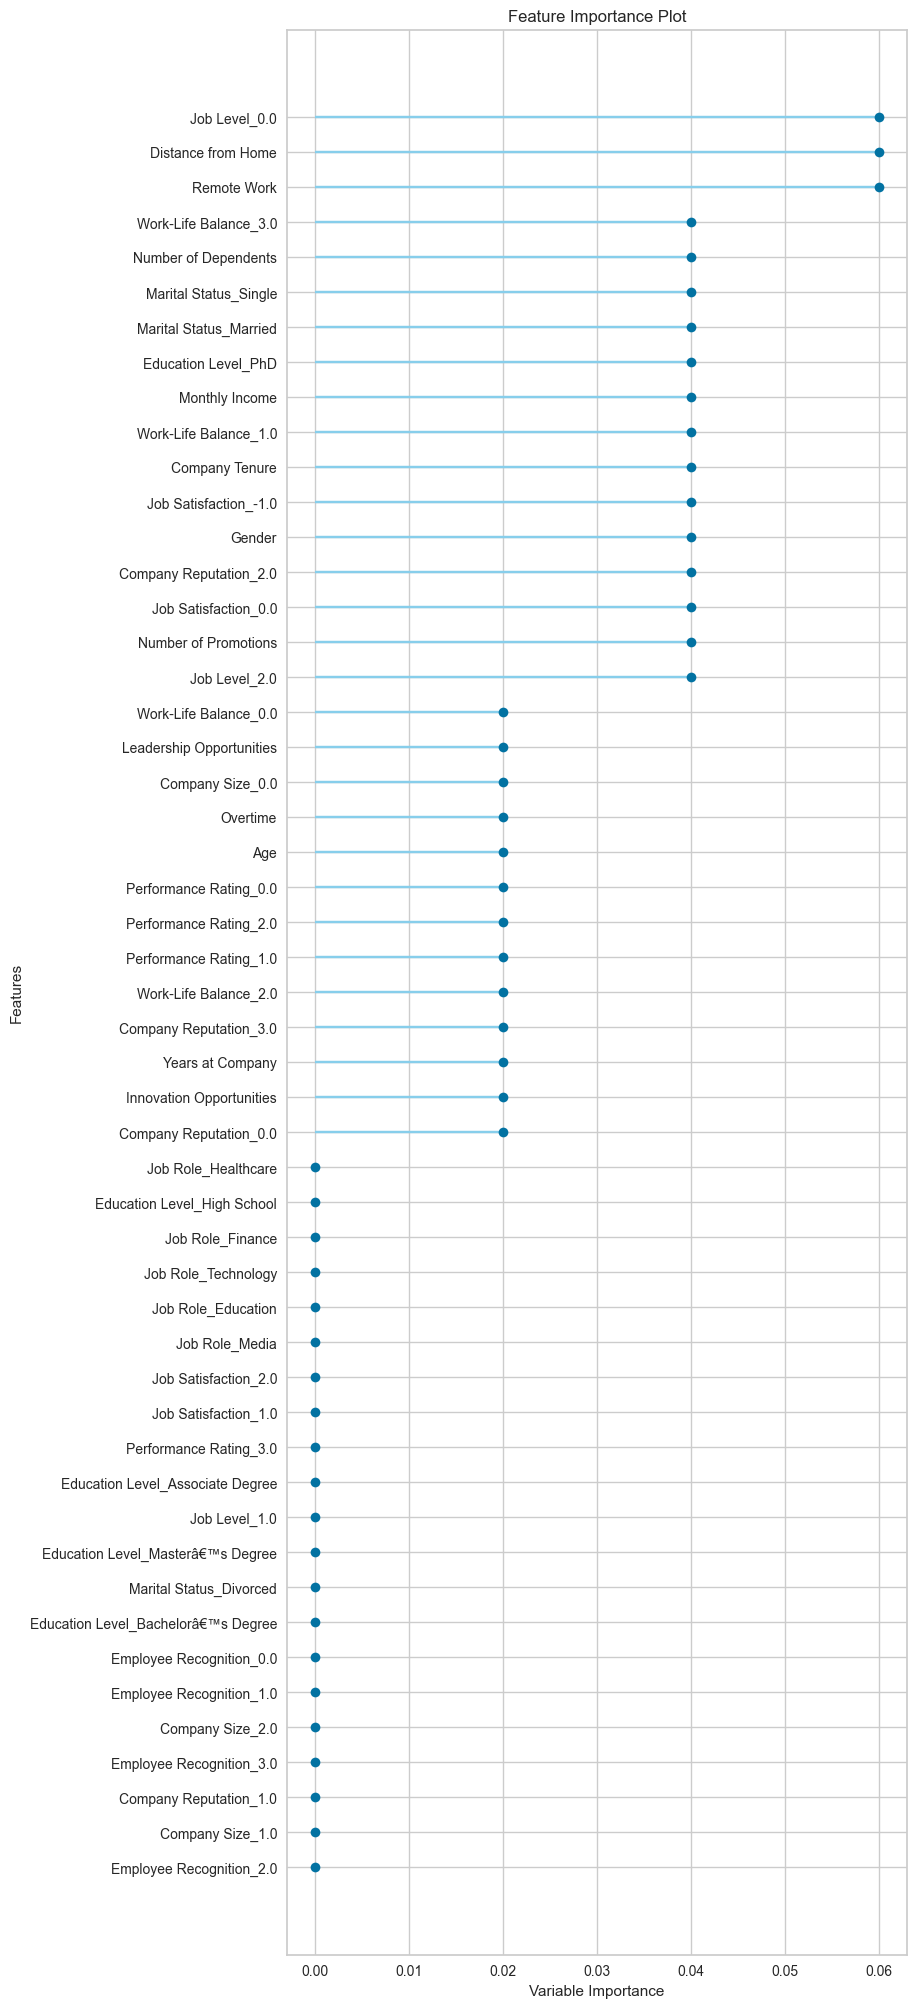

In [69]:
plot_model(best_f1_models, plot = 'feature_all')

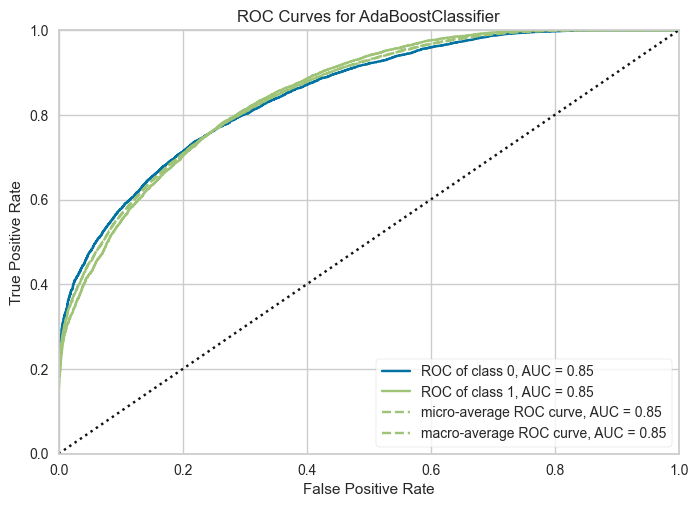

In [70]:
plot_model(best_f1_models, plot = 'auc')

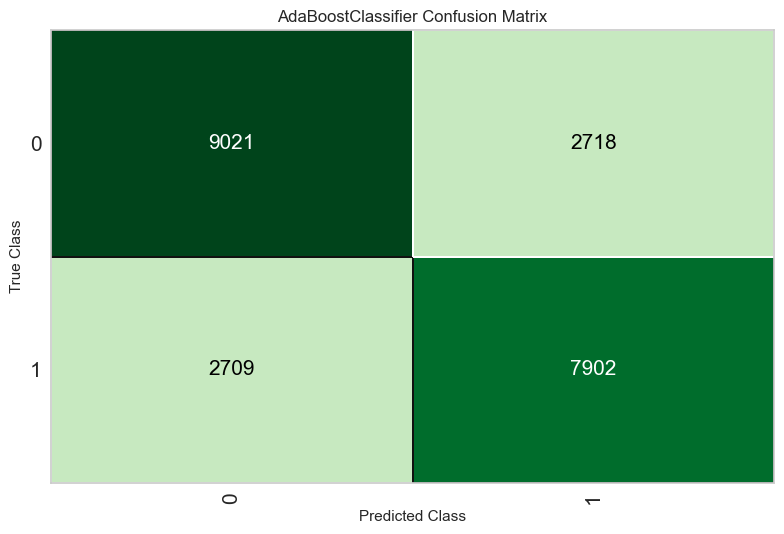

In [71]:
plot_model(best_f1_models, plot = 'confusion_matrix')

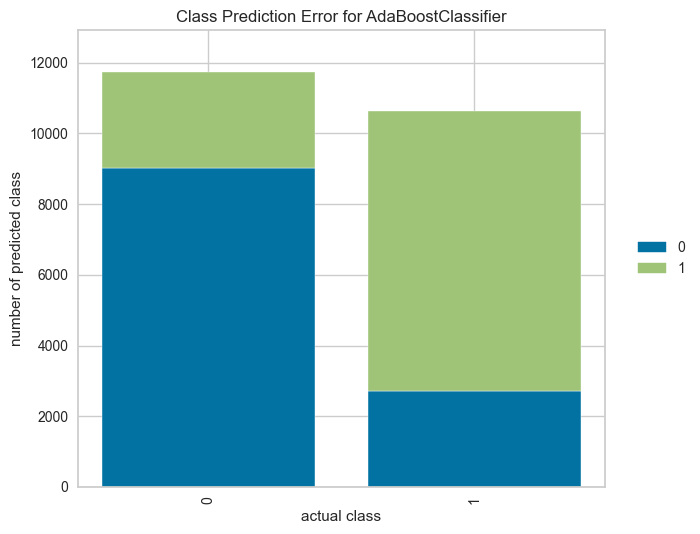

In [72]:
plot_model(best_f1_models, plot = 'error')

In [73]:
best_f1_models = tune_model(best_f1_models, optimize = 'F1', n_iter = 25, search_algorithm='bayesian', search_library='scikit-optimize')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7557,0.8510,0.7427,0.7427,0.7427,0.5102,0.5102
1,0.7616,0.8535,0.7403,0.7534,0.7468,0.5217,0.5218
2,0.7624,0.8574,0.7415,0.7540,0.7477,0.5232,0.5233
3,0.7580,0.8489,0.7371,0.7492,0.7431,0.5144,0.5145
4,0.7601,0.8517,0.7528,0.7447,0.7487,0.5193,0.5193
5,0.7730,0.8633,0.7722,0.7551,0.7636,0.5453,0.5454
6,0.7515,0.8446,0.7330,0.7408,0.7369,0.5015,0.5015
7,0.7701,0.8584,0.7569,0.7584,0.7576,0.5390,0.5390
8,0.7530,0.8463,0.7273,0.7460,0.7365,0.5041,0.5042


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

In [74]:
best_f1_models = calibrate_model(best_f1_models)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7578,0.8509,0.7496,0.7427,0.7461,0.5146,0.5146
1,0.7618,0.8542,0.7407,0.7535,0.7470,0.5221,0.5221
2,0.7640,0.8578,0.7423,0.7561,0.7491,0.5263,0.5264
3,0.7582,0.8492,0.7391,0.7485,0.7438,0.5149,0.5149
4,0.7599,0.8519,0.7553,0.7432,0.7492,0.5190,0.5191
5,0.7737,0.8634,0.7726,0.7561,0.7643,0.5468,0.5469
6,0.7517,0.8451,0.7334,0.7409,0.7372,0.5018,0.5019
7,0.7686,0.8580,0.7565,0.7562,0.7563,0.5359,0.5359
8,0.7522,0.8457,0.7289,0.7439,0.7363,0.5027,0.5027


In [75]:
predict_model(best_f1_models)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.7574,0.8513,0.7460,0.7437,0.7449,0.5136,0.5136


,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition,prediction_label,prediction_score
22233,20,Male,9,Technology,5547,Fair,Medium,Average,0,No,...,Medium,16,No,No,No,Good,Very High,0,0,0.6965
10559,31,Female,5,Healthcare,8385,Good,Low,Average,2,Yes,...,Small,66,Yes,No,No,Good,High,0,0,0.9370
40629,45,Male,5,Education,4470,Fair,Very High,High,2,No,...,Medium,27,No,No,No,Fair,High,1,1,0.9569
21357,54,Female,4,Finance,8301,Fair,High,Average,2,No,...,Medium,81,No,No,No,Good,Low,1,0,0.6813
12458,56,Male,27,Education,5137,Excellent,Very High,Average,1,No,...,Medium,50,No,No,No,Poor,High,1,0,0.6506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39113,58,Male,33,Technology,11106,Good,High,Average,2,No,...,Small,107,No,No,No,Poor,Low,1,1,0.8580
12372,22,Female,2,Healthcare,8904,Good,Medium,Low,1,No,...,Medium,61,Yes,No,No,Good,Medium,0,0,0.6137
52427,27,Female,5,Healthcare,9062,Poor,Low,Average,0,No,...,Medium,10,No,No,No,Poor,Medium,1,1,0.9867
10392,23,Male,5,Technology,9277,Good,Medium,Average,0,No,...,Medium,75,No,No,No,Good,Low,1,0,0.6162


## One Last Shot with Ensemble Methods
- So, we're hovering around the .74 - .75 mark for F1 score with a just above .85 AUC score. These are strong metrics. Next option is to give ensemble methods a go. Knowing that Ada Boosting Models work, we'll create one of them, then use bagging to see if it can give better results than those above.

In [79]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7559,0.8509,0.7468,0.7411,0.7439,0.5107,0.5107
1,0.7616,0.8540,0.7407,0.7532,0.7469,0.5217,0.5218
2,0.7640,0.8578,0.7399,0.7573,0.7485,0.5262,0.5263
3,0.7584,0.8492,0.7379,0.7494,0.7436,0.5152,0.5152
4,0.7597,0.8516,0.7524,0.7443,0.7483,0.5185,0.5185
5,0.7722,0.8633,0.7714,0.7543,0.7628,0.5437,0.5439
6,0.7513,0.8451,0.7314,0.7413,0.7363,0.5010,0.5010
7,0.7697,0.8579,0.7561,0.7582,0.7571,0.5382,0.5382
8,0.7534,0.8457,0.7281,0.7462,0.7370,0.5049,0.5050


In [80]:
bagged_ada = ensemble_model(ada, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7557,0.8506,0.7456,0.7414,0.7435,0.5103,0.5103
1,0.7616,0.8541,0.7383,0.7544,0.7463,0.5216,0.5217
2,0.7630,0.8581,0.7403,0.7556,0.7479,0.5243,0.5244
3,0.7580,0.8490,0.7367,0.7494,0.7430,0.5144,0.5144
4,0.7588,0.8519,0.7504,0.7438,0.7471,0.5165,0.5165
5,0.7735,0.8632,0.7714,0.7564,0.7638,0.5464,0.5464
6,0.7524,0.8451,0.7318,0.7429,0.7373,0.5033,0.5033
7,0.7680,0.8582,0.7544,0.7563,0.7554,0.5347,0.5347
8,0.7512,0.8457,0.7265,0.7436,0.7349,0.5007,0.5008


In [81]:
boosted_ada = ensemble_model(ada, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7567,0.8508,0.7480,0.7417,0.7448,0.5123,0.5123
1,0.7620,0.8541,0.7403,0.7540,0.7471,0.5224,0.5225
2,0.7638,0.8578,0.7403,0.7568,0.7485,0.5258,0.5259
3,0.7580,0.8493,0.7375,0.7490,0.7432,0.5144,0.5145
4,0.7590,0.8517,0.7520,0.7433,0.7476,0.5170,0.5170
5,0.7724,0.8633,0.7702,0.7552,0.7626,0.5440,0.5441
6,0.7511,0.8451,0.7318,0.7408,0.7363,0.5006,0.5007
7,0.7697,0.8579,0.7561,0.7582,0.7571,0.5382,0.5382
8,0.7534,0.8457,0.7285,0.7460,0.7371,0.5049,0.5050


Both of these came pretty close, and could likely perform well if tuned further. That's encouraging.

Ultimately, I'm going to go with "best_f1_models".

In [89]:
save_model(best_f1_models, 'employee_attrit_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Years at Company',
                                              'Monthly Income',
                                              'Number of Promotions',
                                              'Distance from Home',
                                              'Number of Dependents',
                                              'Company Tenure'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                 

## Classification is a tricky one. There are a lot of things to consider:
- How are businesses looking to create value? False/True Negative/Positive rates are important, we may want to reduce costs or increase expected benefits. Finding models that balance on both (i.e., F1 score) may not create the maximum value in a particular context.
- Decision thresholds are also fascinating. Perhaps we'd like to change the point at which the algorithm will say someone is a leaver or a stayer, instead of the default .5 mark. This is another (computationally expensive) way to increase our desired metrics. And it could provide more value by concentrating on more "sure things". Again, this would need a cost/benefit analysis attached to it.
- Further testing, each new iteration of a model can be tested against previous ones to see how they improve. At some point, however, they need to be deployed to work. Setting out with an idea of what you want as minimum viable product metric scores could be worthwhile, especially in business settings.

### Challenges and Lessons Learned
Limitations: one limitation of the model is its reliance on historical data, which may not fully capture future trends or shifts in employee behaviour. Especially in aspects that are more reliant on outside economic factors, such as interest rates, inflation, unemployment rates, and GDP of the economy(ies) in which the business operates. Additionally, while AdaBoost is powerful, it can be sensitive to noisy data and requires careful tuning to avoid overfitting.

### Future Improvements

Future work could involve testing other algorithms, such as incorporating external data sources like industry trends or economic indicators to enhance predictive accuracy. Additionally, integrating natural language processing (NLP) to analyze employee feedback and sentiment could provide deeper insights into attrition risk.

### Business Implications and Applications
Practical Use: The model can be used by HR departments to identify employees at risk of leaving and to take proactive measures, such as offering targeted retention programs or addressing specific job satisfaction issues. By predicting attrition, businesses can reduce turnover costs and maintain a more stable workforce.

Decision-Making: The insights from the model can inform data-driven decisions, such as adjusting compensation packages, revisiting promotion policies, or improving work-life balance initiatives. This empowers HR teams to make strategic interventions that enhance employee retention.

Ethical Considerations: While predictive models offer powerful tools for managing attrition, they also raise ethical concerns. It’s important to ensure that the model is used responsibly, with transparency in how predictions are made and without unfairly targeting or penalizing employees based on the predictions.

### Conclusion
Predicting employee attrition using machine learning offers businesses a valuable opportunity to proactively manage their workforce and reduce turnover costs. While the model I built shows promising results, there’s always room for improvement and further exploration. By continuously refining the model and incorporating new data, businesses can stay ahead of attrition trends and foster a more engaged and loyal workforce.